<center><h1>Predictive Modeling for Optimum Pricing of Ford Cars: A Comprehensive Data Analysis and Regression Approach</h1></center>


In [1]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

In [2]:
import pandas as pd

# Load the dataset into a pandas dataframe
df = pd.read_csv(URL)

# Print the first 5 rows of the dataframe
df.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500


In [3]:
df.describe()

,year,mileage,tax,mpg,engineSize,price
count,17966.000000,17966.000000,17963.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,23362.608761,113.329177,57.906980,1.350807,12279.534844
std,2.050336,19472.054349,62.017631,10.125696,0.432367,4741.343657
min,1996.000000,1.000000,0.000000,20.800000,0.000000,495.000000
25%,2016.000000,9987.000000,30.000000,52.300000,1.000000,8999.000000
50%,2017.000000,18242.500000,145.000000,58.900000,1.200000,11291.000000
75%,2018.000000,31060.000000,145.000000,65.700000,1.500000,15299.000000
max,2060.000000,177644.000000,580.000000,201.800000,5.000000,54995.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   transmission  17966 non-null  object 
 3   mileage       17966 non-null  int64  
 4   fuelType      17966 non-null  object 
 5   tax           17963 non-null  float64
 6   mpg           17966 non-null  float64
 7   engineSize    17966 non-null  float64
 8   price         17966 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.2+ MB


In [4]:
# Identify columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()]

# Fill missing values with the average value of the columns
for column in columns_with_missing_values:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)


#To identify and drop duplicate entries:

# Identify duplicate entries
duplicate_entries = df[df.duplicated()]

# Drop duplicate entries
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17812 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17812 non-null  object 
 1   year          17812 non-null  int64  
 2   transmission  17812 non-null  object 
 3   mileage       17812 non-null  int64  
 4   fuelType      17812 non-null  object 
 5   tax           17812 non-null  float64
 6   mpg           17812 non-null  float64
 7   engineSize    17812 non-null  float64
 8   price         17812 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.4+ MB


C:\Users\sriva\AppData\Local\Temp\ipykernel_9112\1447460659.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mean_value, inplace=True)


In [5]:
df_2 = pd.read_csv(r"C:\Users\sriva\Downloads\synthetic-csv-data (1)\used_car_price_analysis\used_car_price_analysis_synthetic.csv")

df_2.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2015,Manual,13508,Petrol,20.0,63.8,1.0,7999
1,Fiesta,2017,Manual,15500,Petrol,0.0,67.2,1.0,10026
2,KA,2017,Manual,20521,Petrol,30.0,57.7,1.2,6052
3,Kuga,2019,Manual,3102,Petrol,145.0,38.2,1.5,18799
4,Fiesta,2017,Manual,24847,Petrol,30.0,54.6,1.2,8463


In [6]:
merged_df = pd.concat([df, df_2])
merged_df.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500


In [7]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35778 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         35778 non-null  object 
 1   year          35778 non-null  int64  
 2   transmission  35778 non-null  object 
 3   mileage       35778 non-null  int64  
 4   fuelType      35778 non-null  object 
 5   tax           35777 non-null  float64
 6   mpg           35778 non-null  float64
 7   engineSize    35778 non-null  float64
 8   price         35778 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 2.7+ MB


In [8]:
duplicate_entries = merged_df[merged_df.duplicated()]
print(duplicate_entries)

Empty DataFrame
Columns: [model, year, transmission, mileage, fuelType, tax, mpg, engineSize, price]
Index: []


In [9]:

merged_df_dummies = pd.get_dummies(merged_df, columns=['fuelType', 'transmission'])
merged_df_dummies.head()

,model,year,mileage,tax,mpg,engineSize,price,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,fuelType__RARE_,transmission_Automatic,transmission_Manual,transmission_Semi-Auto
0,Fiesta,2017,15944,150.0,57.7,1.0,12000,False,False,False,False,True,False,True,False,False
1,Focus,2018,9083,150.0,57.7,1.0,14000,False,False,False,False,True,False,False,True,False
2,Focus,2017,12456,150.0,57.7,1.0,13000,False,False,False,False,True,False,False,True,False
3,Fiesta,2019,10460,145.0,40.3,1.5,17500,False,False,False,False,True,False,False,True,False
4,Fiesta,2019,1482,145.0,48.7,1.0,16500,False,False,False,False,True,False,True,False,False


In [12]:
merged_df_dummies[['fuelType_Diesel', 'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Other',	'fuelType_Petrol',	'fuelType__RARE_', 'transmission_Automatic', 'transmission_Manual',	'transmission_Semi-Auto']] = merged_df_dummies[['fuelType_Diesel', 'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Other',	'fuelType_Petrol',	'fuelType__RARE_', 'transmission_Automatic', 'transmission_Manual',	'transmission_Semi-Auto']].astype(float)

In [13]:
merged_df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35778 entries, 0 to 17965
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   model                   35778 non-null  object 
 1   year                    35778 non-null  int64  
 2   mileage                 35778 non-null  int64  
 3   tax                     35777 non-null  float64
 4   mpg                     35778 non-null  float64
 5   engineSize              35778 non-null  float64
 6   price                   35778 non-null  int64  
 7   fuelType_Diesel         35778 non-null  float64
 8   fuelType_Electric       35778 non-null  float64
 9   fuelType_Hybrid         35778 non-null  float64
 10  fuelType_Other          35778 non-null  float64
 11  fuelType_Petrol         35778 non-null  float64
 12  fuelType__RARE_         35778 non-null  float64
 13  transmission_Automatic  35778 non-null  float64
 14  transmission_Manual     35778 non-null  flo

In [15]:
merged_df_dummies.tail(10)

,model,year,mileage,tax,mpg,engineSize,price,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol,fuelType__RARE_,transmission_Automatic,transmission_Manual,transmission_Semi-Auto
17956,EcoSport,2017,12530,145.0,53.2,1.0,11478,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
17957,Kuga,2019,6807,145.0,35.7,1.5,21043,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
17958,Fiesta,2011,42098,20.0,62.9,1.0,6348,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
17959,Kuga,2017,13697,145.0,54.8,2.0,14463,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
17960,Focus,2020,1372,145.0,50.8,1.0,19770,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
17961,Fiesta,2015,70424,30.0,54.7,1.2,5153,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
17962,Mustang,2017,22158,150.0,68.7,2.0,19027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17963,Fiesta,2013,64121,125.0,54.5,1.2,6295,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
17964,Focus,2015,24420,20.0,60.4,1.0,8594,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
17965,C-MAX,2017,14041,145.0,52.0,1.5,12497,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [17]:
# Select only numeric columns from the DataFrame
numeric_df = merged_df_dummies.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Sort the correlation values for the 'price' parameter in descending order
price_correlation = correlation_matrix['price'].sort_values(ascending=False)

# Get the top 6 attributes with the highest correlation (excluding 'price' itself)
top_attributes = price_correlation[1:10]

print(top_attributes)
#print(correlation_matrix)

year                      0.598714
engineSize                0.414730
tax                       0.399421
fuelType_Diesel           0.229122
transmission_Automatic    0.177266
transmission_Semi-Auto    0.113994
fuelType_Hybrid           0.046201
fuelType__RARE_           0.006030
fuelType_Electric         0.005390
Name: price, dtype: float64


In [19]:
# Group by 'model' and 'fuelType' and count the number of occurrences
model_fueltype_count = merged_df.groupby(['model', 'fuelType']).size().reset_index(name='count')

model_fueltype_count.head()

,model,fuelType,count
0,B-MAX,Diesel,147
1,B-MAX,Petrol,538
2,C-MAX,Diesel,604
3,C-MAX,Hybrid,1
4,C-MAX,Petrol,429


In [21]:
# Count the number of entries for each unique 'fuelType' value
fueltype_counts = df['fuelType'].value_counts()

print(fueltype_counts)

fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


We will Create a Box plot to determine whether cars with automatic, manual or semi-auto type of transmission have more price outliers. Use the Seaborn library for creating the plot.

In [23]:
!pip install seaborn matplotlib


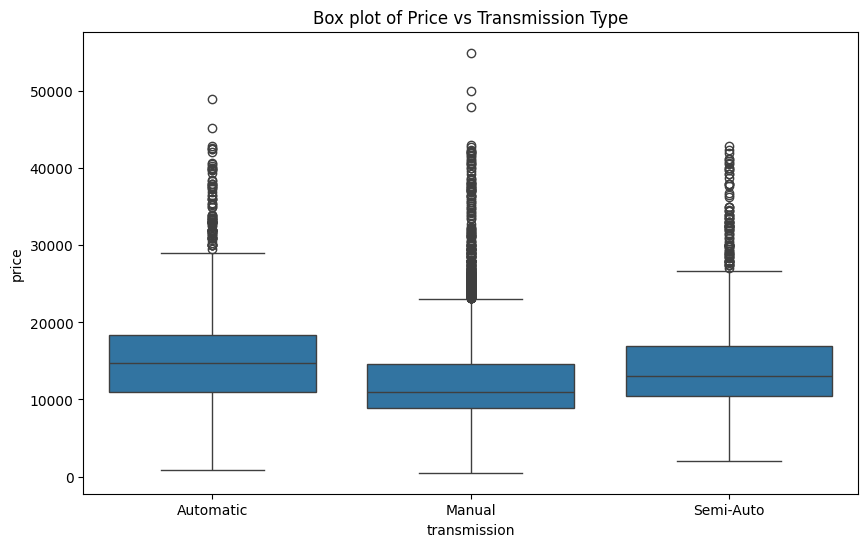

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Box plot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='price', data=merged_df)
plt.title('Box plot of Price vs Transmission Type')
plt.show()

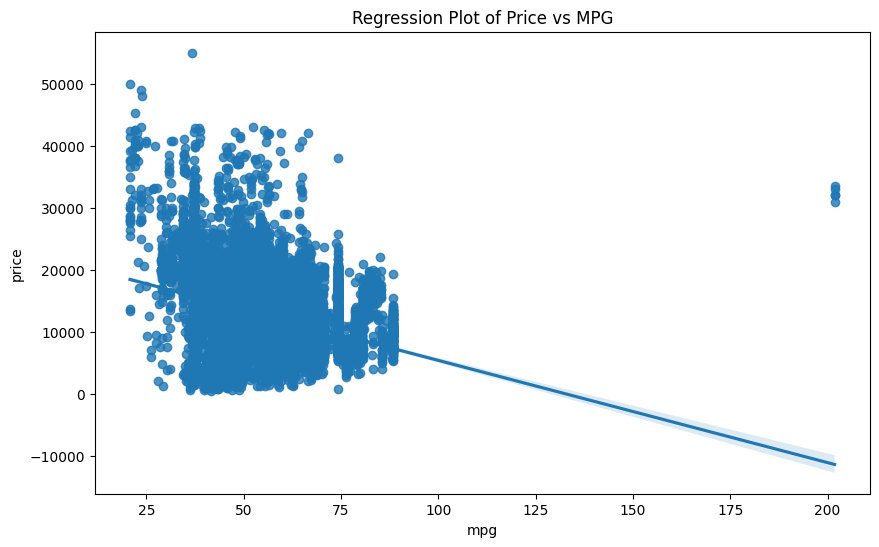

In [26]:
# Create a regression plot using Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='mpg', y='price', data=merged_df)
plt.title('Regression Plot of Price vs MPG')
plt.show()

In [29]:
!pip install scikit-learn


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Define the feature and target variables
X = merged_df[['mpg']]
y = merged_df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate R^2 and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R^2:", r2)
print("MSE:", mse)

R^2: 0.11606670136490216
MSE: 20289817.126704037


In [32]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35778 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         35778 non-null  object 
 1   year          35778 non-null  int64  
 2   transmission  35778 non-null  object 
 3   mileage       35778 non-null  int64  
 4   fuelType      35778 non-null  object 
 5   tax           35777 non-null  float64
 6   mpg           35778 non-null  float64
 7   engineSize    35778 non-null  float64
 8   price         35778 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 3.7+ MB


In [33]:
# Identify columns with missing values
columns_with_missing_values = merged_df.columns[merged_df.isnull().any()]

# Fill missing values with the average value of the columns
for column in columns_with_missing_values:
    mean_value = merged_df[column].mean()
    merged_df[column].fillna(mean_value, inplace=True)

C:\Users\sriva\AppData\Local\Temp\ipykernel_9112\933328055.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[column].fillna(mean_value, inplace=True)


In [35]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35778 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         35778 non-null  object 
 1   year          35778 non-null  int64  
 2   transmission  35778 non-null  object 
 3   mileage       35778 non-null  int64  
 4   fuelType      35778 non-null  object 
 5   tax           35778 non-null  float64
 6   mpg           35778 non-null  float64
 7   engineSize    35778 non-null  float64
 8   price         35778 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 3.7+ MB


In [36]:
# Define the features and target variable
X = merged_df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = merged_df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate R^2 and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R^2:", r2)
print("MSE:", mse)

R^2: 0.6606028956763532
MSE: 7790525.813082265


In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Define the features and target variable
X = merged_df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = merged_df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline model
model = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('regression', LinearRegression())
])

# Fit the pipeline model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate R^2 and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R^2:", r2)
print("MSE:", mse)

R^2: 0.6851975131578865
MSE: 7225980.624240421


In [38]:
from sklearn.linear_model import Ridge

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a Ridge regression object with regularization parameter 0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred = ridge_model.predict(X_test)

# Calculate R^2
r2 = r2_score(y_test, y_pred)

print("R^2:", r2)

R^2: 0.6606028014855645


In [41]:
# Perform second-order polynomial transform on the features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit a Ridge regression object with regularization parameter 0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_poly, y_train)

# Make predictions
y_pred = ridge_model.predict(X_test_poly)

# Calculate R^2 and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R^2:", round(r2, 2))
print("MSE:", round(mse,4))

R^2: 0.69
MSE: 7223907.2204


c:\Users\sriva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.1062e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [44]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Create a pipeline that includes standardization, polynomial features, and Ridge regression
pipeline = make_pipeline(
    StandardScaler(),  # Standardize the features
    PolynomialFeatures(degree=2),  # Apply polynomial features
    Ridge()  # Ridge regression
)

# Define the range of alpha values for Grid Search
param_grid = {'ridge__alpha': [0.1, 1, 10, 100, 1000]}  # Adjusted alpha values

# Perform Grid Search with 4-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=4)
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['ridge__alpha']

print("Optimum alpha value:", best_alpha)


Optimum alpha value: 1000
